#                                             <center>Malaria Cell Detection</center>

<center><img src="https://media.giphy.com/media/132Afq7xvIjJy8/giphy.gif" width=350></ceenter>

# Importing libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
from PIL import Image
from tensorflow import keras
import tensorflow.keras.layers as k
from tqdm.notebook import tqdm
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils  import to_categorical
from sklearn.model_selection import train_test_split

# Converting images to same pixels size and array conversion for input format

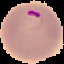

In [2]:
load_img("Malarial Cell Image Data\cell_images\Parasitized\C33P1thinF_IMG_20150619_114756a_cell_181.png",target_size=(64,64))

In [3]:
# setting tensorflow as backend
os.environ["KERAS_BACKEND"]="tensorflow"

In [4]:
# to get same output when using rand
np.random.seed(312)

In [5]:
# to store initial path and other two to store all data and their labels
image_dir="Malarial Cell Image Data/cell_images"
data_x=[]
data_y=[]

In [6]:
# full path for parasited cells
para_img=os.listdir(image_dir+"/Parasitized")

In [7]:
# fetching parasited images and conerting same pixels size and array format and storing in data along with labels
for i in tqdm(para_img[:4100]):
    path=image_dir+"\Parasitized"+"\\"+i
    img_array=cv2.imread(path)
    img_resized=Image.fromarray(img_array,"RGB")
    img_resized=img_resized.resize((64,64))
    img=np.array(img_resized)
    data_x.append(img)
    data_y.append(1)

  0%|          | 0/4100 [00:00<?, ?it/s]

In [8]:
# full paths of uninfected cells
un_img=os.listdir(image_dir+"/Uninfected")

In [9]:
# fetching uninfected images and conerting same pixels size and array format and storing in data along with labels
for i in tqdm(un_img[:4100]):
    path=image_dir+"/Uninfected"+"/"+i
    img_array=cv2.imread(path)
    img_resized=Image.fromarray(img_array,"RGB")
    img_resized=img_resized.resize((64,64))
    img=np.array(img_resized)
    data_x.append(img)
    data_y.append(0)

  0%|          | 0/4100 [00:00<?, ?it/s]

# Splitting data for training and testing

In [10]:
# splitting data to 2 parts for testing and training 
x_train,x_test,y_train,y_test=train_test_split(data_x,to_categorical(data_y),test_size=0.3)

In [11]:
# (1,0) means uninfected while (0,1) means infected

# Preaparing Model CNN + Neural Network

<center><img src="https://media.giphy.com/media/5k5vZwRFZR5aZeniqb/giphy.gif" width=300></center>

In [12]:
# Defining Architecture of model
inp=k.Input(shape=(64,64,3))
conv1=k.Conv2D(32,kernel_size=(3,3),activation="relu",padding="same")(inp)
pool1=k.MaxPool2D(pool_size=(2,2))(conv1)
norm1=k.BatchNormalization(axis=-1)(pool1)
drop1=k.Dropout(rate=0.2)(norm1)
conv2=k.Conv2D(32,kernel_size=(3,3),activation="relu",padding="same")(drop1)
pool2=k.MaxPool2D(pool_size=(2,2))(conv2)
norm2=k.BatchNormalization(axis=-1)(pool2)
drop2=k.Dropout(rate=0.2)(norm2)
flat=k.Flatten()(drop2)
hidden1=k.Dense(512,activation="relu")(flat)
norm3=k.BatchNormalization(axis=-1)(hidden1)
drop3=k.Dropout(rate=0.2)(norm3)
hidden2=k.Dense(216,activation="relu")(drop3)
norm4=k.BatchNormalization(axis=-1)(hidden2)
drop4=k.Dropout(rate=0.2)(norm4)
out=k.Dense(2,activation="sigmoid")(drop4)
model=keras.Model(inputs=inp,outputs=out)
model.compile(optimizer="Adam",metrics=["accuracy"],loss="categorical_crossentropy")

# Training the model

In [13]:
# Fitting aka training the model
model.fit(np.array(x_train),y_train,batch_size=128,verbose=1,epochs=15)

Epoch 1/15


45/45 [==============================] - 17s 301ms/step - loss: 0.5014 - accuracy: 0.7955
Epoch 2/15
45/45 [==============================] - 14s 313ms/step - loss: 0.3224 - accuracy: 0.8552
Epoch 3/15
45/45 [==============================] - 14s 322ms/step - loss: 0.2672 - accuracy: 0.8793
Epoch 4/15
45/45 [==============================] - 14s 319ms/step - loss: 0.2189 - accuracy: 0.9056
Epoch 5/15
45/45 [==============================] - 15s 323ms/step - loss: 0.1799 - accuracy: 0.9287
Epoch 6/15
45/45 [==============================] - 15s 323ms/step - loss: 0.1316 - accuracy: 0.9479
Epoch 7/15
45/45 [==============================] - 15s 327ms/step - loss: 0.1091 - accuracy: 0.9577
Epoch 8/15
45/45 [==============================] - 15s 328ms/step - loss: 0.0912 - accuracy: 0.9639
Epoch 9/15
45/45 [==============================] - 14s 319ms/step - loss: 0.0748 - accuracy: 0.9713
Epoch 10/15
45/45 [==============================] - 15s 323ms/step - loss: 0.0652 - accu

# Predicting a.k.a Testing

In [14]:
# getting model predictions
y_predict=model.predict(np.array(x_test))

77/77 [==============================] - 2s 26ms/step


In [15]:
y_predict

array([[0.02915121, 0.9799233 ],
       [0.9994389 , 0.00133332],
       [0.1114294 , 0.80060905],
       ...,
       [0.8263661 , 0.5770953 ],
       [0.26437783, 0.9227317 ],
       [0.9957358 , 0.01202773]], dtype=float32)

In [16]:
# coversion of prediction to result format
for i in range(len(y_predict)):
    idx1=y_predict[i][0]
    idx2=y_predict[i][1]
    if idx1>0.5:
        y_predict[i][0]=1
    else:
        y_predict[i][0]=0
    if idx2>0.5:
        y_predict[i][1]=1
    else:
        y_predict[i][1]=0

#  Check for Accuracy

In [17]:
# Counting correct and wrong predictions
correct=0
wrong=0
for i in range(len(y_test)):
    if y_test[i][0]==y_predict[i][0] and y_test[i][1]==y_predict[i][1]:
        correct+=1
    else:
        wrong+=1
print("Correct prediction count : ",correct)
print("Incorrect prediction count : ",wrong)

Correct prediction count :  2038
Incorrect prediction count :  422


In [19]:
# Accuracy using r2_score method
R2_score=correct*100/(correct+wrong)
print("R2_score : ",R2_score)

R2_score :  82.84552845528455


<center><img src="https://media.giphy.com/media/3mgqx7KV95ESazDCCn/giphy.gif" width=500></center>